# L'extension [Matplotlib](https://matplotlib.org/)

L'extension [Matplotlib](https://matplotlib.org/) est une extension Python pour réaliser des graphiques. Elle est ancienne, toujours d'actualité et beaucoup d'autres extensions [ont été bâties sur elle](https://matplotlib.org/mpl-third-party/), comme par exemple [seaborn](https://seaborn.pydata.org/), qui se spécialise pour les graphiques dans le domaine statistique ou [pandas](https://pandas.pydata.org/) qui est une extension Python pour les tables et qui se sert de cette extension pour proposer ses propres commandes graphiques. La seule extension graphique que je connaisse et qui ne soit pas connectée à matplotlib est [plotly](https://plotly.com/python/), qui fera l'objet d'une autre présentation.

Matplotlib ayant suivi les évolutions de Python, cette extension est assez [polymorphe](https://matplotlib.org/stable/users/explain/api_interfaces.html) et offre beaucoup de façons de faire la même chose. Certains tutoriels peuvent présenter des raccourcis très efficaces pour obtenir des résultats époustouflants, mais dès qu'on veut personnaliser son graphique, il devient obligatoire de mieux maîtriser cette extension.

[Matplotlib](https://matplotlib.org/stable/users/explain/api_interfaces.html) a deux interfaces majeurs de programmation :
- l'interface utilisant les objets [Axes](https://matplotlib.org/stable/api/axes_api.html) qui représente les (sous) graphes d'une [figure](https://matplotlib.org/stable/api/figure_api.html). C'est la méthode orientée objet qui utilise la hiérachie d'objet de matplotlib, qui a pour objet racine l'objet appelé [Artist](https://matplotlib.org/stable/api/artist_api.html) dont découle tous les objets intervenant dans une figure contenant des graphiques.
- l'interface implicite [pyplot](https://matplotlib.org/stable/api/pyplot_summary.html) qui fonctionne à la façon de [Matlab](https://fr.mathworks.com/products/matlab.html). La dernière figure crée est conservée en mémoire de telle sorte que toutes les commandes s'appliquent à elle par défaut.

# L'interface explicite Axes

Cet interface est plus lourd à mettre en place, mais permet des personnalisations plus fines.

Cet interface fonctionne en instanciant la classe [Figure](https://matplotlib.org/stable/api/figure_api.html#matplotlib.figure.Figure) (ce sera l'objet `fig` dans le code ci-dessous) and utilisant ensuite la méthode [subplots](https://matplotlib.org/stable/api/figure_api.html#matplotlib.figure.Figure.subplots) (ou similaire) pour créer un ou plusieurs objets [Axes](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.html#matplotlib.axes.Axes) (appelé `ax` ci-dessous). On utilise ensuite une méthode d'affichage comme la méthode [plot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html). Enfin, la commande [show](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.show.html) affiche le graphique, ici dans l'interface Jupyter.

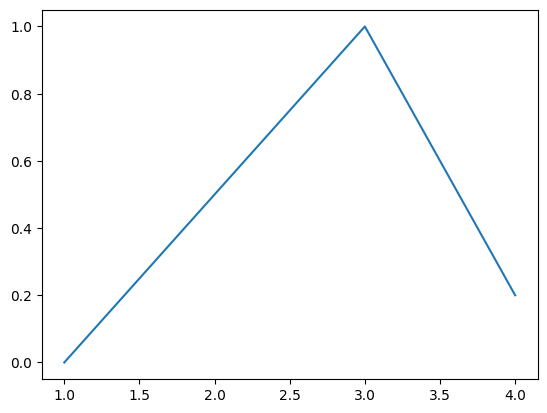

In [4]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.subplots()
ax.plot([1,2,3,4], [0,0.5, 1, 0.2])
plt.show()

On nomme cette méthode explicite, car chaque objet est explicitement référencé et utilisé pour créer l'objet suivant. Avoir ainsi les références de tous les objets permet ensuite beaucoup de flexibilité pour personnaliser ces objets après leur création et avant leur affichage.

# L'interface implicite pyplot

Cette interface est souvent présenté dans les tutoriels, car il permet d'afficher simplement un diagramme standard. La figure précédente peut ainsi s'afficher directement avec les commandes suivantes.

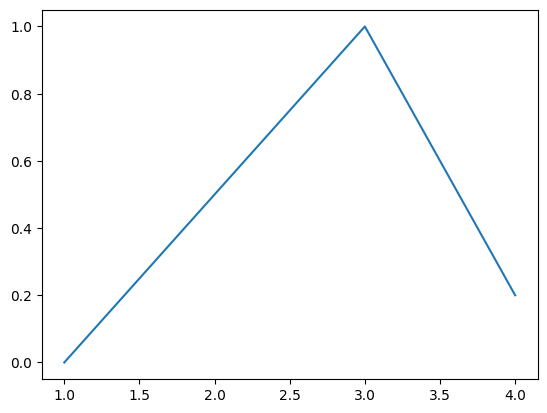

In [3]:
import matplotlib.pyplot as plt
plt.plot([1,2,3,4],[0, 0.5,1,0.2])
plt.show()

C'est une méthode pratique pour un script simple ou rapide. La référence à l'objet figure peut néanmoins être retrouvée grâce à la commande [gcf](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.gcf.html#matplotlib.pyplot.gcf) et à l'objet Axes grâce à la commande [gca](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.gca.html#matplotlib.pyplot.gca). À l'inverse, si on a conservé le lien vers l'objet Axes (par exemple dans une liste), ou peut remettre cette figure référencée comme figure par défaut avec [sca](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.sca.html).

Le module [pyplot](https://matplotlib.org/stable/api/pyplot_summary.html#module-matplotlib.pyplot) retient le liste des figures et chaque figure retient la liste des axes sur cette figuren de telle sorte que l'utilisateur puisse écrire des commandes du genre suivant.

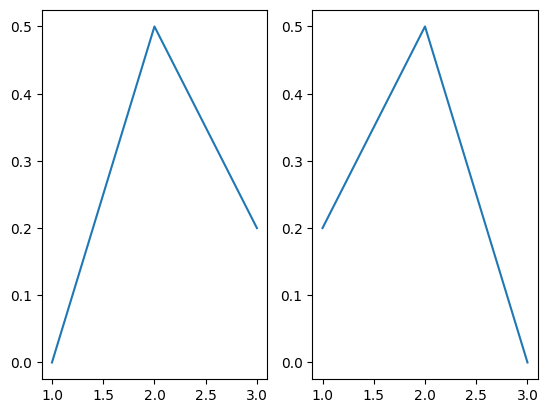

In [5]:
import matplotlib.pyplot as plt

plt.subplot(1, 2, 1)
plt.plot([1, 2, 3], [0, 0.5, 0.2])

plt.subplot(1, 2, 2)
plt.plot([3, 2, 1], [0, 0.5, 0.2])

qui est équivalent au code suivant.

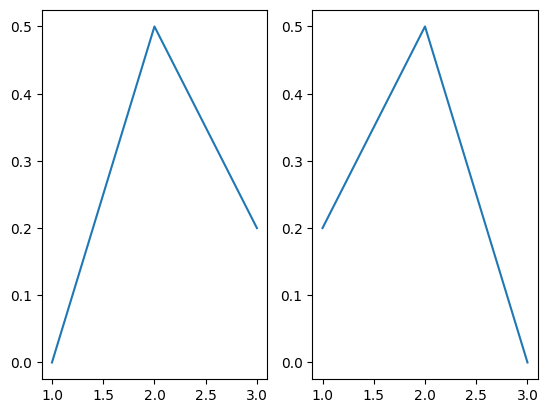

In [7]:
import matplotlib.pyplot as plt

plt.subplot(1, 2, 1)
ax = plt.gca()   # récupération de l'objet Axes dans ax
ax.plot([1, 2, 3], [0, 0.5, 0.2])

plt.subplot(1, 2, 2)
ax = plt.gca()  # récupération du deuxième objet Axes dans ax
ax.plot([3, 2, 1], [0, 0.5, 0.2])

Si nous travaillons en mode complètement explicite, les commandes seraient alors les suivantes.

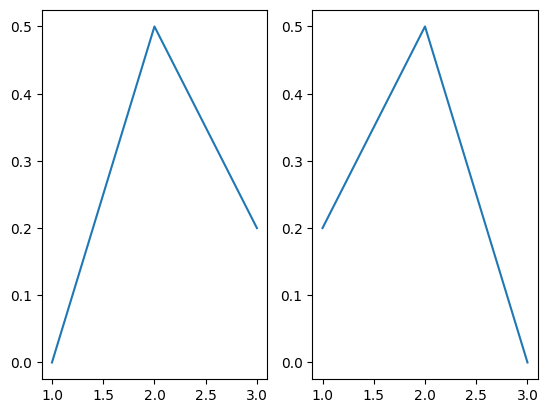

In [6]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2)
axs[0].plot([1, 2, 3], [0, 0.5, 0.2])
axs[1].plot([3, 2, 1], [0, 0.5, 0.2])

La méthode implicite peut nécessiter quelques détours si on veut ensuite personnaliser la figure. Voici l'exemple ou nous voulons donner un titre indépendant à chaque sous Axes. Pour cela, on sauvegarde les Axes dans une liste et les ré-appelle ensuite avec la méthode [sca](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.sca.html) pour appliquer le traitement sur la figure par défaut.

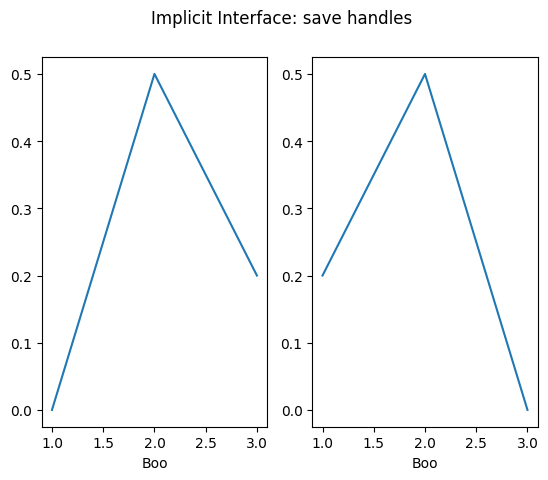

In [8]:
import matplotlib.pyplot as plt

axs = []
ax = plt.subplot(1, 2, 1)
axs += [ax]  # sauvegarde du lien (handle) vers ax
plt.plot([1, 2, 3], [0, 0.5, 0.2])

ax = plt.subplot(1, 2, 2)
axs += [ax]
plt.plot([3, 2, 1], [0, 0.5, 0.2])

plt.suptitle('Implicit Interface: save handles')

for i in range(2):
    plt.sca(axs[i])   # axs[i] devient la figure courante
    plt.xlabel('Boo') # personnalisation du titre


C'est donc possible, mais finalement assez lourd.

La méthode implicite fonctionne bien quand les courbes offertes en standard sont suffisantes. Si on veut les personnaliser, mieux vaut alors passer par l'interface explicite qui permet de réferencer plus clairement l'objet qu'on veut personnaliser.

# Les extensions tierses qui incluent matplotlib

Des extensions tierces peuvent toujours intégrer matplotlib. Nous montrons ici un exemple sur un objet que nous crééons, le `DataContainer`. Le constructeur de l'objet lui donne la série de `x` et `y` et ensuite nous définissons une méthode `plot` qui renvoit un objet `Axes` affichant le graphe qui correspond à ces coordonnées. Ici, soit nous utilisons le dernier objet Axes par défaut avec la commande `gca`, soit cet objet est donné en argument à la commande `plot` pour inclure ce graphe dans un axe pré-existant.

Le parmètre optionnel [**kwargs](https://realpython.com/python-kwargs-and-args/) permet de prévoir d'ajouter tous les autres paramètres possibles de la méthode [plot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html).

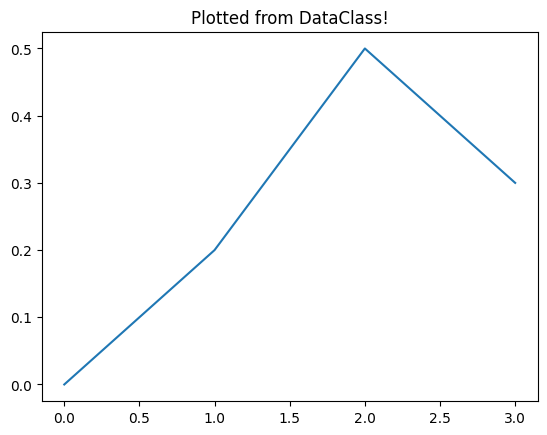

In [18]:
import matplotlib.pyplot as plt

# supplied by downstream library:
class DataContainer:

    def __init__(self, x, y):
        """
        Proper docstring here!
        """
        self._x = x
        self._y = y

    def plot(self, ax=None, **kwargs):
        if ax is None:
            ax = plt.gca()
        ax.plot(self._x, self._y, **kwargs)
        ax.set_title('Plotted from DataClass!')
        return ax


# what the user usually calls:
data = DataContainer([0, 1, 2, 3], [0, 0.2, 0.5, 0.3])
data.plot()
plt.show()

# Les types de graphes

Le type de graphe va être déterminé par la commande utilisée pour mettre en valeur les données :
- [plot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html) fait un tracé de ligne en `x,y`;
- [scatter](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html#matplotlib.pyplot.scatter) affiche les données plutôt sous la forme d'un nuage de points.
- [histogram](https://matplotlib.org/stable/gallery/statistics/hist.html) pour les histogrammes. On peut aussi faire les [histogrammes cummulatif associés](https://matplotlib.org/stable/gallery/statistics/histogram_cumulative.html) ou [des barres superposées](https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_label_demo.html#sphx-glr-gallery-lines-bars-and-markers-bar-label-demo-py)
- [pie](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.pie.html#matplotlib.axes.Axes.pie), les diagrammes en fromages ;
- [radar chart](https://matplotlib.org/stable/gallery/specialty_plots/radar_chart.html) les diagrammes dits 'radar' 
- [imshow](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html) pour afficher simplement une image donnée comme une matrice de points

Le principe d'utilisation de la documentation est de fouiller dans [la bilbiothèque d'exemple](https://matplotlib.org/stable/gallery/index.html) poour retrouver le graphe le plus proche de celui qu'on veut construire et ensuite de s'en inspirer

# Les objets graphiques

L'introduction [quick start](https://matplotlib.org/stable/tutorials/introductory/quick_start.html) donne un schéma visualisant les principaux objets graphiques. On peut aussi retrouver la hiérarchie complète des objets sur l'objet de base [Artist](https://matplotlib.org/stable/api/artist_api.html).